In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import scanpy as sc
import pycea as py

import importlib
import os
import numpy as np
import pandas as pd
import anndata


file_path = os.path.join(os.getcwd(), "../src/spotr/", "utils.py")
spec = importlib.util.spec_from_file_location("utils", file_path)
utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(utils)

file_path = os.path.join(os.getcwd(), "../src/spotr/", "visium_simulator.py")
spec = importlib.util.spec_from_file_location("visium_simulator", file_path)
visium_simulator = importlib.util.module_from_spec(spec)
spec.loader.exec_module(visium_simulator)


file_path = os.path.join(os.getcwd(), "../src/spotr/", "spotr.py")
spec = importlib.util.spec_from_file_location("spotr", file_path)
spotr = importlib.util.module_from_spec(spec)
spec.loader.exec_module(spotr)

/Users/pedroferreira/miniconda3/envs/phylospatial/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/pedroferreira/miniconda3/envs/phylospatial/lib/python3.10/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/Users/pedroferreira/miniconda3/envs/phylospatial/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text ins

In [ ]:
tdata = py.datasets.koblan25()
tdata

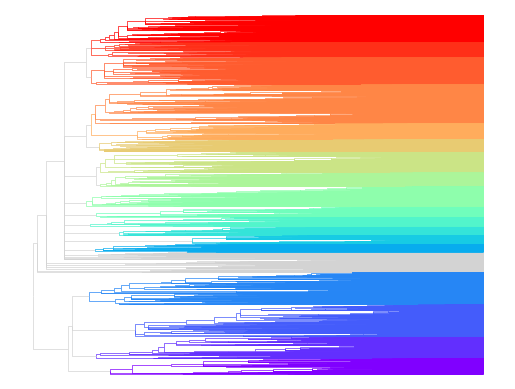

In [8]:
clade_palette = py.get.palette(tdata, key="clade", cmap="rainbow")
py.pl.tree(tdata, depth_key="time", branch_color="clade", palette=clade_palette, legend=False);

/var/folders/d4/tfj5y66n2zzddb2k40xhyhk80000gp/T/ipykernel_14022/1135318084.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata, color="clade", spot_size=40, frameon=False, legend_loc=None)


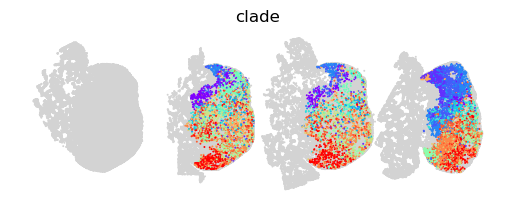

In [9]:
sc.pl.spatial(tdata, color="clade", spot_size=40, frameon=False, legend_loc=None)


In [10]:
n_extant = py.tl.n_extant(tdata, depth_key="time", groupby="clade", bins=20, dropna=True, copy=True)
n_extant.sort_values(["clade", "time"]).head(10)

time  n_extant  tree clade
378   0.00         0  tree     1
379   1.75         0  tree     1
380   3.50         1  tree     1
381   5.25         1  tree     1
382   7.00         3  tree     1
383   8.75         4  tree     1
384  10.50         4  tree     1
385  12.25         7  tree     1
386  14.00        16  tree     1
387  15.75        23  tree     1

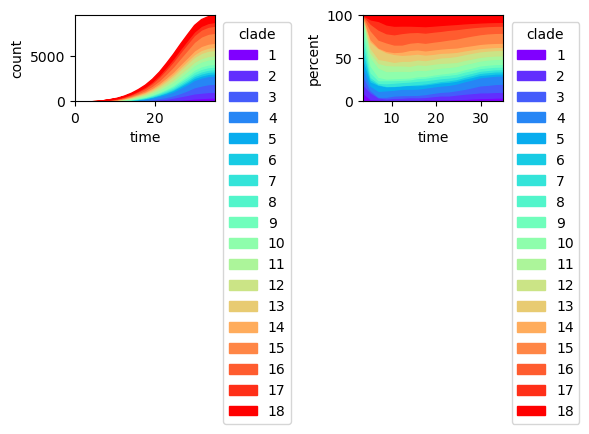

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
py.pl.n_extant(tdata, ax=axes[0])
py.pl.n_extant(tdata, ax=axes[1], stat="percent")
plt.tight_layout()

In [12]:
py.tl.fitness(tdata, depth_key="time", method="sbd")

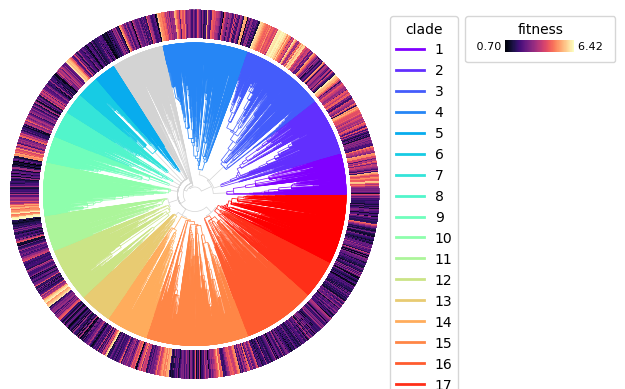

In [13]:
py.pl.tree(tdata, depth_key="time", branch_color="clade", palette=clade_palette, polar=True)
py.pl.annotation(tdata, keys="fitness", width=0.2, cmap="magma");

/var/folders/d4/tfj5y66n2zzddb2k40xhyhk80000gp/T/ipykernel_14022/3638498150.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata, color="fitness", spot_size=40, frameon=False, cmap="magma");


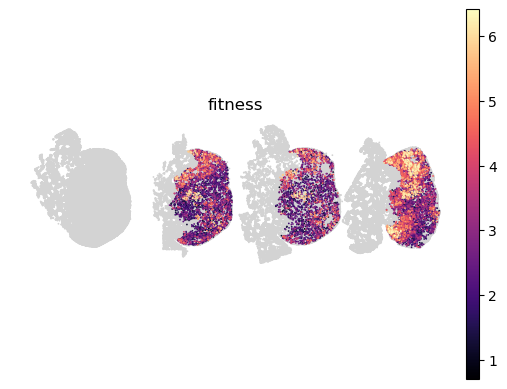

In [14]:
sc.pl.spatial(tdata, color="fitness", spot_size=40, frameon=False, cmap="magma");

/var/folders/d4/tfj5y66n2zzddb2k40xhyhk80000gp/T/ipykernel_14022/163125774.py:6: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata_slice, color=["clade", "fitness", "cell_subtype"], spot_size=40, frameon=False, cmap="magma");
/Users/pedroferreira/miniconda3/envs/phylospatial/lib/python3.10/site-packages/scanpy/plotting/_utils.py:482: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


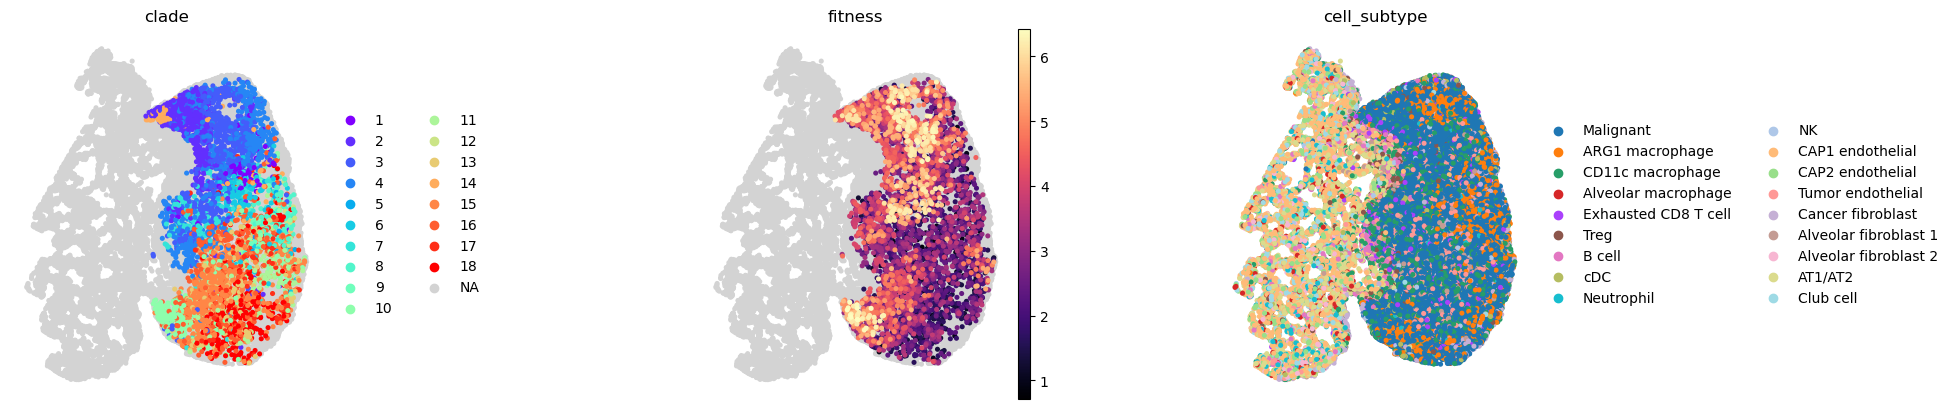

In [15]:
# Select one slice
tdata.obs["slice"] = tdata.obs["sample"].apply(lambda x: "slice_" + x.split("-")[1])

tdata_slice = tdata[tdata.obs["slice"] == "slice_4"]
tdata_slice.obs["slice"].value_counts()
sc.pl.spatial(tdata_slice, color=["clade", "fitness", "cell_subtype"], spot_size=40, frameon=False, cmap="magma");

In [16]:
# Subset to only cancer cells in the tree
import pandas as pd
tdata_slice = tdata_slice[~pd.isna(tdata_slice.obs["clade"])]

/Users/pedroferreira/miniconda3/envs/phylospatial/lib/python3.10/site-packages/pycea/tl/clades.py:160: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  tdata.obs[key_added] = tdata.obs.index.map(node_to_clade[key_added])


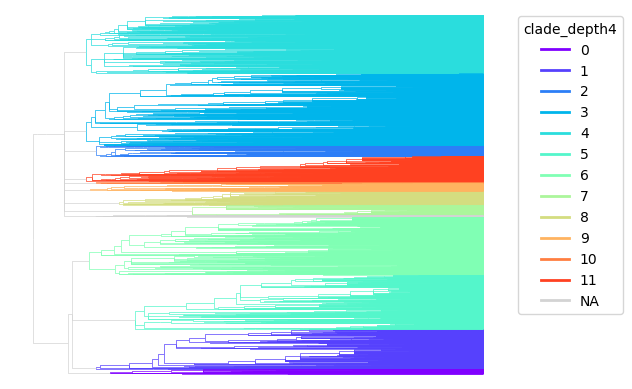

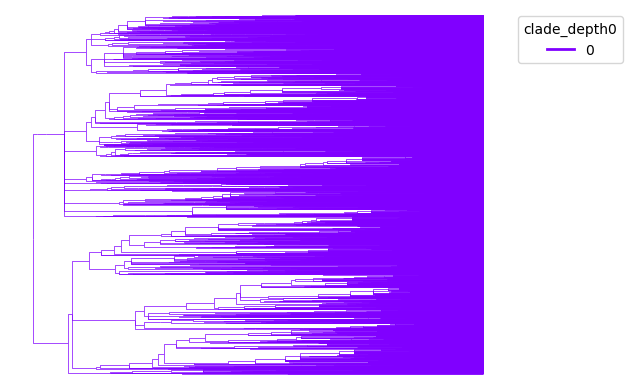

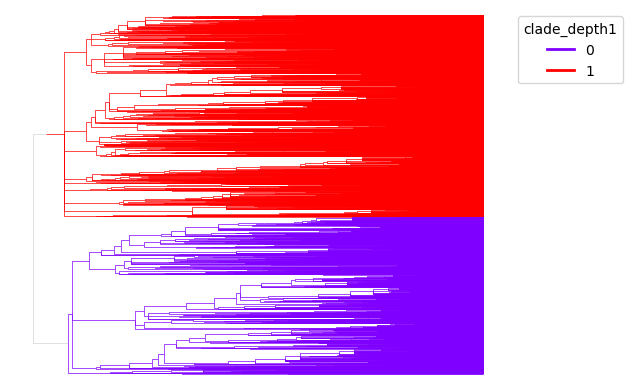

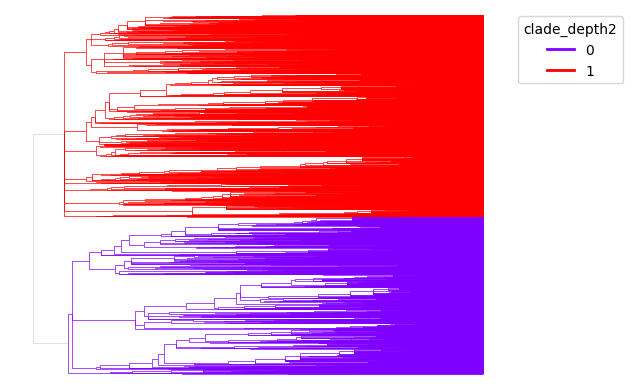

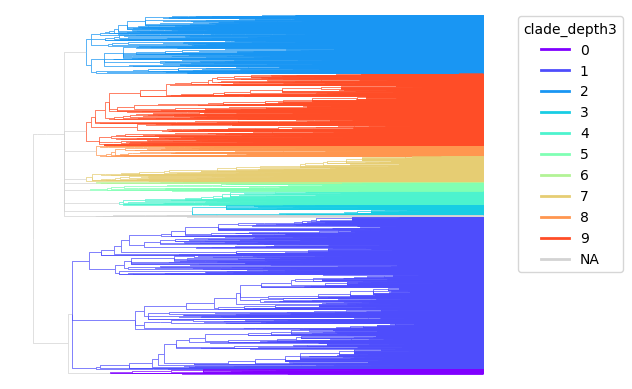

In [22]:
utils.annotate_clades(tdata_slice, max_depth=4)

/var/folders/d4/tfj5y66n2zzddb2k40xhyhk80000gp/T/ipykernel_14022/3352166282.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata_slice, color=["clade_depth4", "fitness"], spot_size=40, frameon=False, cmap="magma");


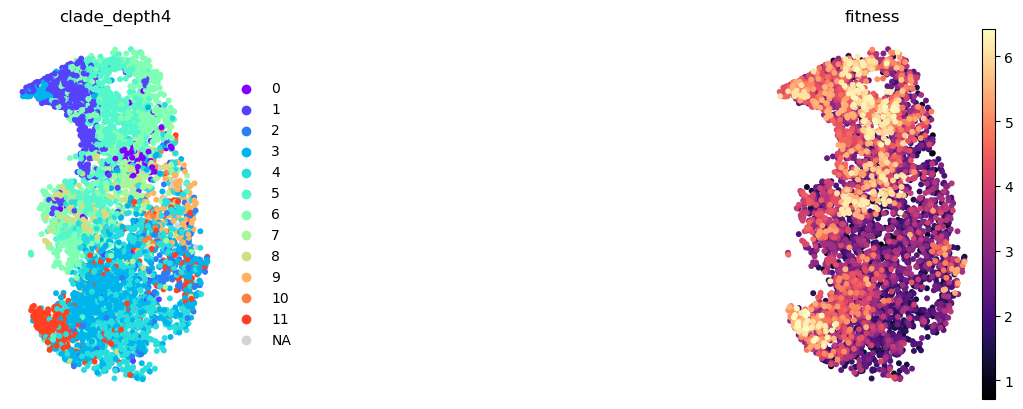

In [23]:
sc.pl.spatial(tdata_slice, color=["clade_depth4", "fitness"], spot_size=40, frameon=False, cmap="magma");

In [24]:
tdata_slice.obs['cell_subtype'].value_counts()

cell_subtype
Malignant    4562
Name: count, dtype: int64

In [25]:
expr = sc.get.obs_df(tdata_slice, keys=list(tdata_slice.var_names))
expr.corrwith(tdata_slice.obs["fitness"]).sort_values(ascending=False).head(10)

Cldn4     0.194677
Lef1      0.134444
Fgf1      0.124911
Fgfbp1    0.111328
Ung       0.077355
Tcf7      0.061165
Cdca2     0.060520
Inava     0.048466
Foxm1     0.048305
Gpr141    0.045765
dtype: float64

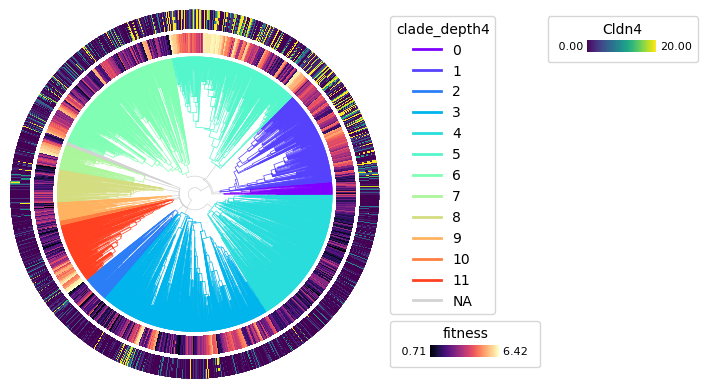

In [28]:
py.pl.tree(tdata_slice, depth_key="time", branch_color="clade_depth4",  polar=True)
py.pl.annotation(tdata_slice, keys="fitness", width=0.15, cmap="magma")
py.pl.annotation(tdata_slice, keys="Cldn4", width=0.15, vmax=20);

In [29]:
py.tl.tree_neighbors(tdata_slice, n_neighbors=10)
heritability = py.tl.autocorr(tdata_slice, method="moran", copy=True)
heritability.sort_values("autocorr", ascending=False).head(10)

autocorr  pval_norm  var_norm
Cldn4  0.186703        0.0  0.000015
Lef1   0.156998        0.0  0.000015
Itgb4  0.141815        0.0  0.000015
Sdc1   0.138607        0.0  0.000015
Sox9   0.132407        0.0  0.000015
Krt19  0.125755        0.0  0.000015
Vegfa  0.120693        0.0  0.000015
Wnt7b  0.108808        0.0  0.000015
Nes    0.106353        0.0  0.000015
Cdca2  0.096239        0.0  0.000015

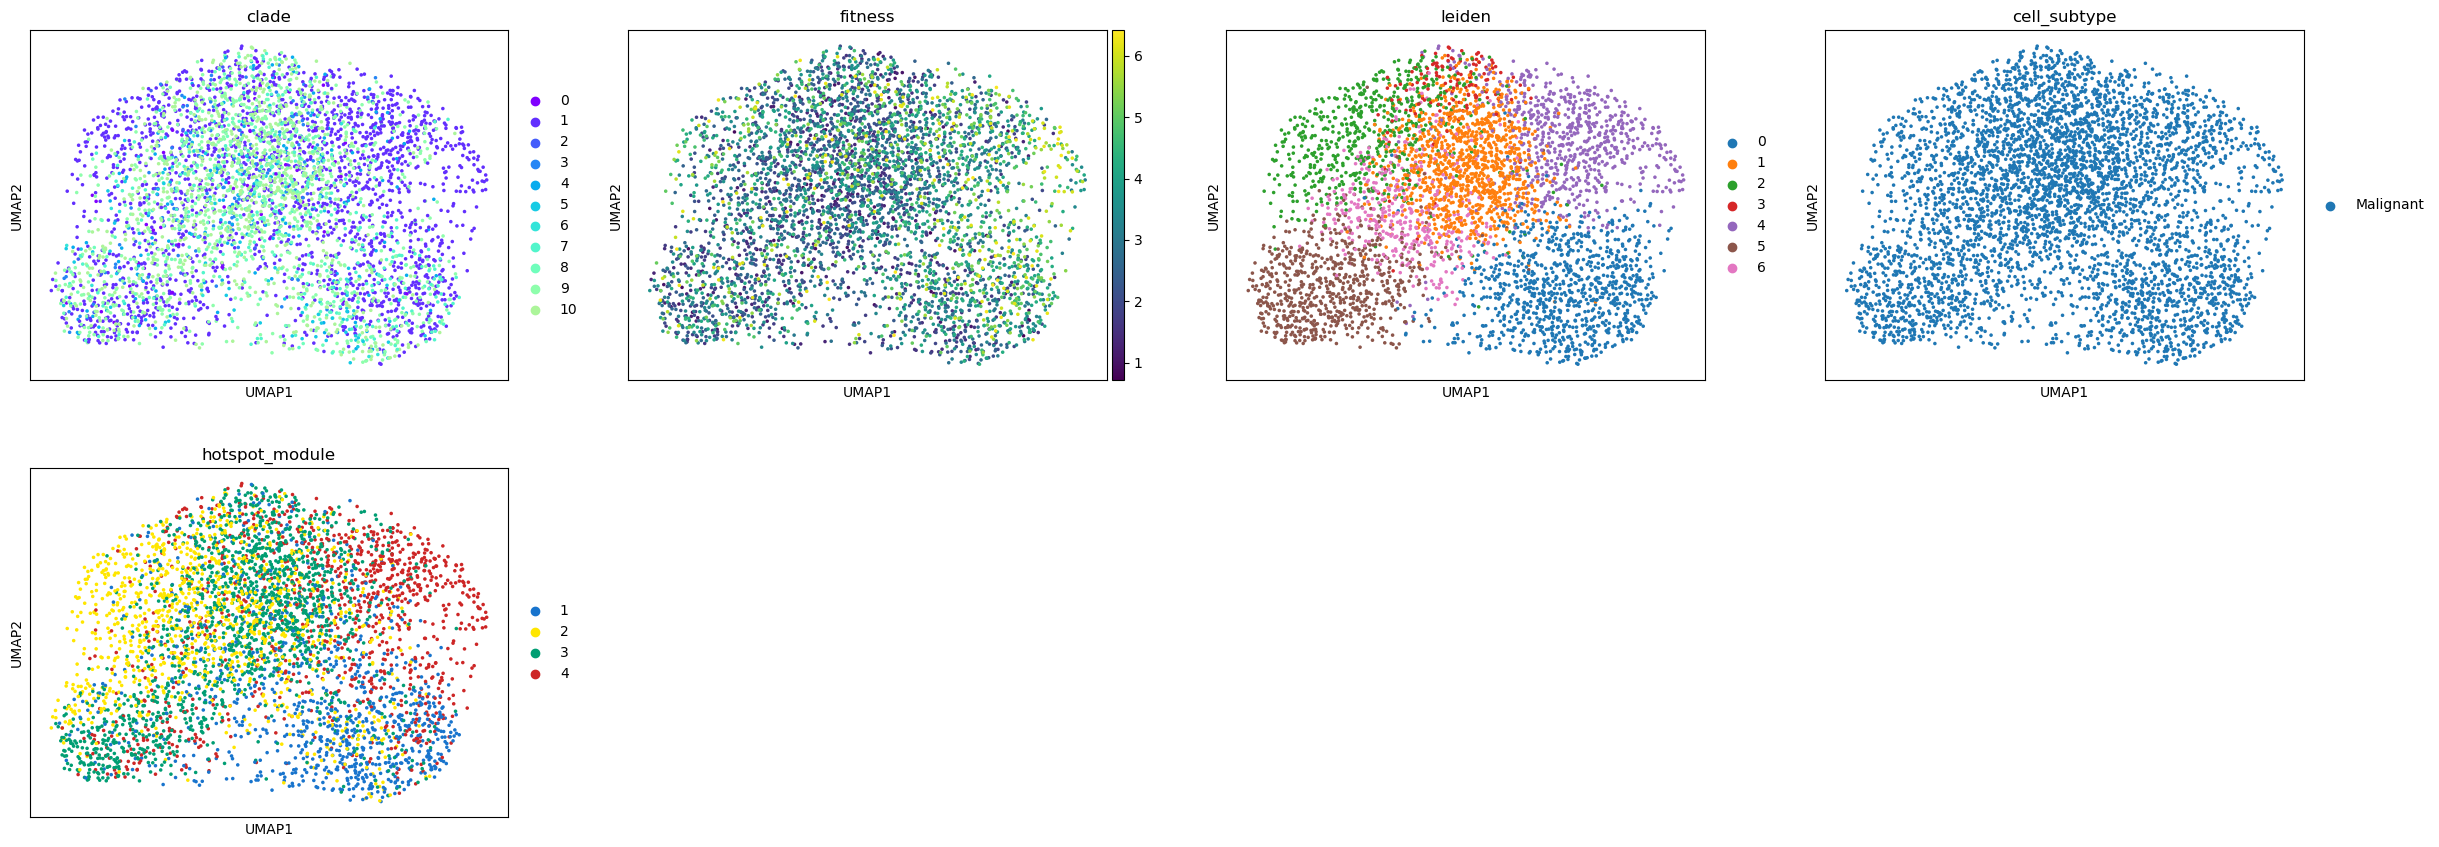

In [30]:
tdata_slice.layers['counts'] = tdata_slice.X.toarray().copy()
sc.pp.normalize_total(tdata_slice)
sc.pp.log1p(tdata_slice)
sc.tl.pca(tdata_slice)
sc.pp.neighbors(tdata_slice)
sc.tl.leiden(tdata_slice, flavor="igraph")
sc.tl.umap(tdata_slice, random_state=0)
sc.pl.umap(tdata_slice, color=["clade", "fitness", "leiden", "cell_subtype", "hotspot_module"])

/var/folders/d4/tfj5y66n2zzddb2k40xhyhk80000gp/T/ipykernel_14022/743697300.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(tdata_slice, color=["hotspot_module"], spot_size=40, frameon=False, cmap="magma");


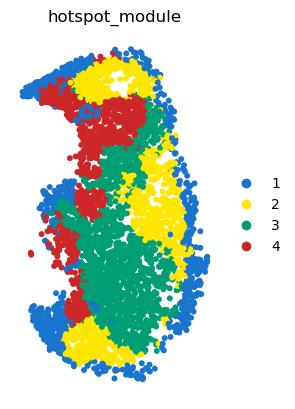

In [31]:
sc.pl.spatial(tdata_slice, color=["hotspot_module"], spot_size=40, frameon=False, cmap="magma");

In [32]:
tdata_slice

TreeData object with n_obs × n_vars = 4562 × 175
    obs: 'sample', 'cell', 'cellBC', 'fov', 'centroid_x', 'centroid_y', 'centroid_z', 'n_layers', 'volume', 'n_genes_by_counts', 'total_counts', 'cell_subtype', 'true_proportion', 'diffusion_proportion', 'background_proportion', 'total_density', 'tumor', 'tumor_boundary_dist', 'within_tumor', 'lung_boundary_dist', 'type', 'clone', 'detection_rate', 'tree', 'fitness', 'clade', 'character_dist_of_relatives', 'local_character_diversity', 'hotspot_module', 'phase', 'edit_frac', 'leiden_cluster', 'slice', 'clade_depth4', 'clade_depth0', 'clade_depth1', 'clade_depth2', 'clade_depth3', 'leiden'
    uns: 'clone_characters', 'clone_colors', 'hotspot_module_colors', 'leiden_cluster_colors', 'within_tumor_colors', 'clade_colors', 'n_extant', 'cell_subtype_colors', 'clade_depth4_colors', 'clade_depth0_colors', 'clade_depth1_colors', 'clade_depth2_colors', 'clade_depth3_colors', 'tree_neighbors', 'moranI', 'log1p', 'pca', 'neighbors', 'leiden', 'umap

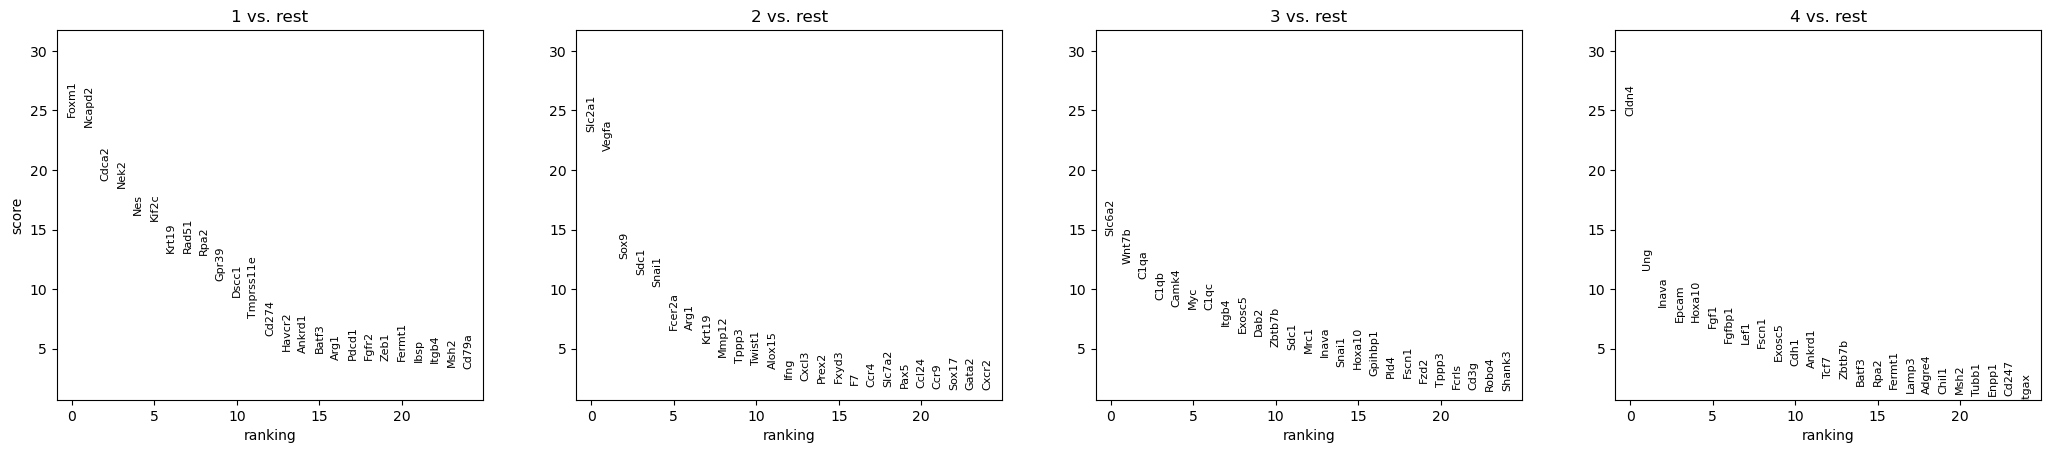

1    86
3    37
2    35
4    17
Name: count, dtype: int64

In [33]:
# Get the genes for the modules
sc.tl.rank_genes_groups(tdata_slice, "hotspot_module", method="wilcoxon")
sc.pl.rank_genes_groups(tdata_slice, n_genes=25)

# # Get matrix of scores of genes in modules
d = []
modules = tdata_slice.obs["hotspot_module"].unique()
for module in modules:
    df = sc.get.rank_genes_groups_df(tdata_slice, module)
    df.set_index('names', inplace=True)
    d.append(df['scores'])
modules_by_genes = pd.concat(d, axis=1)
modules_by_genes.columns = modules
# Assign each gene to the module with the highest score
gene_module_assignments = modules_by_genes.idxmax(axis=1)

# Create a binary matrix: gene x module
gene_by_module_binary = pd.get_dummies(gene_module_assignments)

gene_by_module_binary
# How many genes in each module?
genes_per_module = gene_module_assignments.value_counts()
genes_per_module


In [34]:
# Create binary cell by module matrix with cell to module assignments
# For each cell, identify its module assignment and build the binary matrix
cell_module_assignments = tdata_slice.obs["hotspot_module"]
cell_by_module_binary = pd.get_dummies(cell_module_assignments)
cell_by_module_binary

1      2      3      4
M3-4-5151   True  False  False  False
M3-4-5194   True  False  False  False
M3-4-5200   True  False  False  False
M3-4-5205   True  False  False  False
M3-4-5211   True  False  False  False
...          ...    ...    ...    ...
M3-4-77763  True  False  False  False
M3-4-77833  True  False  False  False
M3-4-77916  True  False  False  False
M3-4-77988  True  False  False  False
M3-4-77989  True  False  False  False

[4562 rows x 4 columns]

In [35]:
cell_type_signatures = gene_by_module_binary.loc[tdata_slice.var_names].T.values.astype(float)
cell_type_assignments = cell_by_module_binary.loc[tdata_slice.obs.index].values.astype(float)

<Axes: >

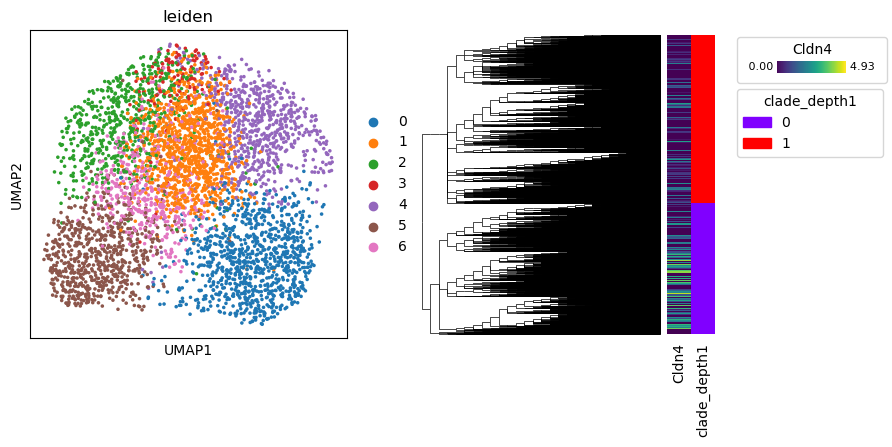

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sc.pl.umap(tdata_slice, color=["leiden"], ax=axes[0], show=False)
py.pl.tree(tdata_slice, keys=["Cldn4", "clade_depth1"], extend_branches=True, annotation_width=0.1, ax=axes[1])

# Synthetic real Visium
Aggregate cells into spots

In [37]:
import importlib
import os
import numpy as np
import pandas as pd
import anndata


file_path = os.path.join(os.getcwd(), "../src/spotr/", "visium_simulator.py")
spec = importlib.util.spec_from_file_location("visium_simulator", file_path)
visium_simulator = importlib.util.module_from_spec(spec)
spec.loader.exec_module(visium_simulator)

def simulate_visium(ss_simulated_adata, obs_model='normal', sigma=0.1, clade_key='clade', cell_size=0.001):
    n_genes = ss_simulated_adata.shape[1]

    x = ss_simulated_adata.obsm['spatial'][:, 0]
    y = ss_simulated_adata.obsm['spatial'][:, 1]
    x = x-np.min(x)
    y = y-np.min(y)
    x = x / np.max(x)
    y = y / np.max(y)
    gx, gy = visium_simulator.map_points_to_grid_lowerleft(
        x, y,
        xmin=0.0, ymin=0.0, 
        dx=cell_size, dy=cell_size
    )

    cell_spot_locations = np.c_[gx, gy]
    spots = np.unique(cell_spot_locations, axis=0)
    # Make a vector of cell to spot names indicating which spot each cell belongs to
    # For each cell, find the index of its spot in the unique spots array, then assign the corresponding spot name
    cells_to_spots = np.array([
        f'spot_{np.where((spots == loc).all(axis=1))[0][0]}' for loc in cell_spot_locations
    ])
    ss_simulated_adata.obs['spot'] = cells_to_spots

    # Simulate Visium data
    n_spots = spots.shape[0]
    spot_expression = np.zeros((n_spots, n_genes))
    spot_names = [f'spot_{i}' for i in range(n_spots)]
    cells_in_spots = []
    clades_fractions = []
    clade_level2_assignments = []
    for spot in range(n_spots):
        spot_cells = np.where(cells_to_spots == f'spot_{spot}')[0]
        spot_expression[spot] = np.mean(ss_simulated_adata.layers['counts'][spot_cells], axis=0) # all transcripts
        cells_in_spots.append(len(spot_cells))
        # Ensure clade_counts contains all possible clade_level2 values, fill missing with 0
        clade_counts = ss_simulated_adata.obs.iloc[spot_cells][clade_key].value_counts(dropna=False)
        clade_counts = clade_counts.reindex(ss_simulated_adata.obs[clade_key].unique(), fill_value=0)
        clades_fractions.append(clade_counts/len(spot_cells))
        value_counts = ss_simulated_adata.obs.iloc[spot_cells][clade_key].value_counts()
        if value_counts.sum() > 0:
            clade_level2_assignments.append(value_counts.idxmax())
        else:
            clade_level2_assignments.append(np.nan)
    if obs_model == 'normal':
        spatial_transcriptomes = np.random.normal(spot_expression, sigma)
    elif obs_model == 'poisson':
        spatial_spot_library_sizes = np.random.poisson(1000, size=n_spots) * 0 + 1
        spatial_spot_gene_sizes = np.random.poisson(100, size=n_genes) * 0 + 1
        spatial_transcriptomes = np.random.poisson(np.exp(spot_expression) * spatial_spot_library_sizes[:, None] * spatial_spot_gene_sizes[None, :])
    else:
        raise ValueError(f"Invalid observation model: {obs_model}")

    spatial_simulated_adata = anndata.AnnData(pd.DataFrame(spatial_transcriptomes, index=spot_names, columns=ss_simulated_adata.var_names))
    spatial_simulated_adata.obsm['spatial'] = spots
    spatial_simulated_adata.obsm[f'{clade_key}_fractions'] = pd.DataFrame(clades_fractions, index=spot_names, columns=ss_simulated_adata.obs[clade_key].unique()).loc[spatial_simulated_adata.obs.index]
    spatial_simulated_adata.obs[clade_key] = clade_level2_assignments
    spatial_simulated_adata.obs['cells_in_spots'] = cells_in_spots
    spatial_simulated_adata.uns[f'{clade_key}_colors'] = ss_simulated_adata.uns[f'{clade_key}_colors']
    # Sort spots per clade
    # spatial_simulated_adata = spatial_simulated_adata[spatial_simulated_adata.obs[clade_key].sort_values().index]

    return spatial_simulated_adata



In [38]:
sdata_slice = simulate_visium(tdata_slice, clade_key='clade_depth4', cell_size=0.02)
sdata_slice

AnnData object with n_obs × n_vars = 1535 × 175
    obs: 'clade_depth4', 'cells_in_spots'
    uns: 'clade_depth4_colors'
    obsm: 'spatial', 'clade_depth4_fractions'

/var/folders/d4/tfj5y66n2zzddb2k40xhyhk80000gp/T/ipykernel_14022/1900496072.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(sdata_slice, color=['clade_depth4', 'cells_in_spots'], spot_size=.02,)


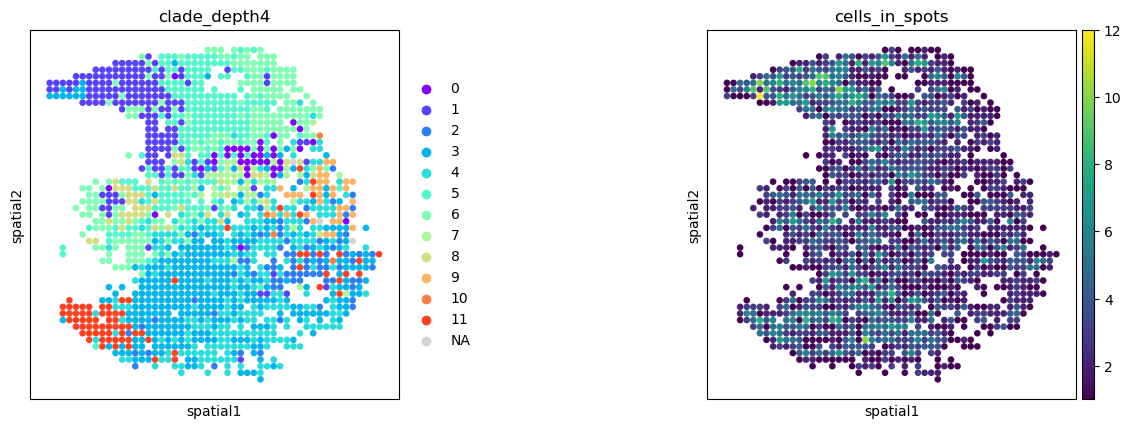

In [39]:
sc.pl.spatial(sdata_slice, color=['clade_depth4', 'cells_in_spots'], spot_size=.02,)

# Map single-cell data to spots and learn alphas

In [40]:
from scipy.spatial.distance import squareform, pdist

# Get distance matrices
tdata_slice = tdata_slice[tdata_slice.obs['clade_depth4'].sort_values().index]
py.tl.tree_distance(tdata_slice)
tree_distance_matrix = tdata_slice.obsp['tree_distances']
tree_distance_matrix = tree_distance_matrix / tree_distance_matrix.max()
tree_distance_matrix = pd.DataFrame(tree_distance_matrix, index=tdata_slice.obs.index, columns=tdata_slice.obs.index)
sdata_slice = sdata_slice[sdata_slice.obs['clade_depth4'].sort_values().index]
spatial_distance_matrix = squareform(pdist(sdata_slice.obsm['spatial'], metric='euclidean'))
spatial_distance_matrix = spatial_distance_matrix / spatial_distance_matrix.max()
spatial_distance_matrix = pd.DataFrame(spatial_distance_matrix, index=sdata_slice.obs.index, columns=sdata_slice.obs.index)

# Get true couplings
true_couplings = np.zeros((tdata_slice.shape[0], sdata_slice.shape[0]))
for i, cell in enumerate(tdata_slice.obs.index):
    spot = tdata_slice.obs.loc[cell, 'spot']
    spot_idx = np.where(sdata_slice.obs.index == spot)[0][0]
    true_couplings[i, spot_idx] = 1

/Users/pedroferreira/miniconda3/envs/phylospatial/lib/python3.10/site-packages/pycea/tl/tree_distance.py:248: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  tdata.uns[f"{key_added}_distances"] = param_dict


In [41]:
tdata_slice.obsp['tree_distances']

array([[ 0,  9, 10, ..., 16, 14, 16],
       [ 9,  0,  7, ..., 19, 17, 19],
       [10,  7,  0, ..., 20, 18, 20],
       ...,
       [16, 19, 20, ...,  0,  6, 10],
       [14, 17, 18, ...,  6,  0,  8],
       [16, 19, 20, ..., 10,  8,  0]])

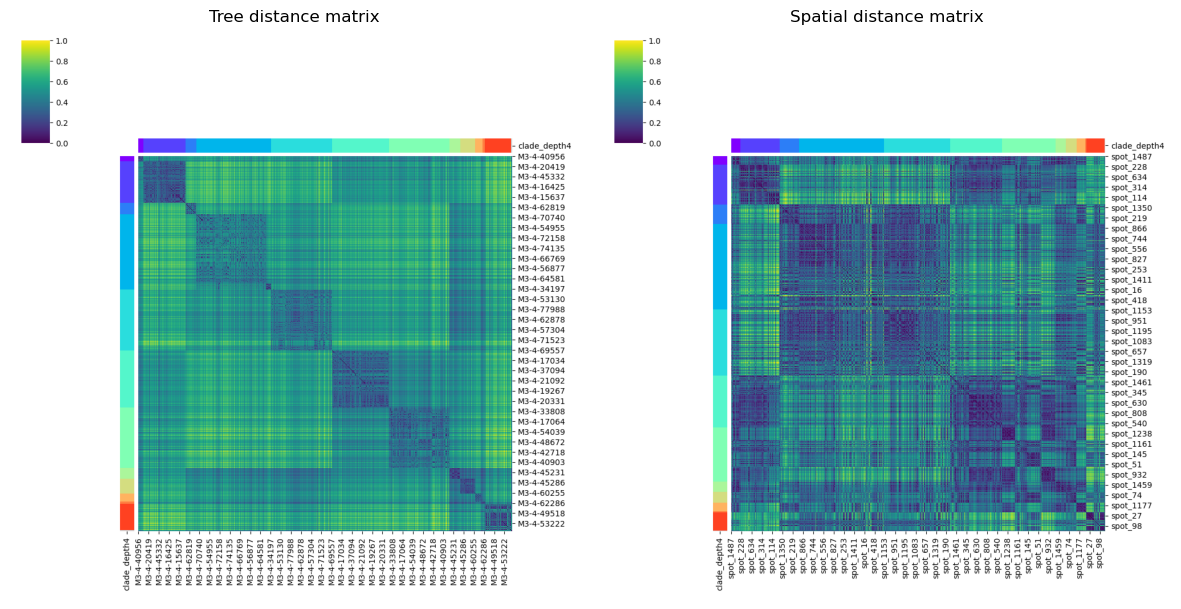

In [42]:
import seaborn as sns
lut = dict(zip(tdata_slice.obs['clade_depth4'].unique(), tdata_slice.uns['clade_depth4_colors']))
row_colors = tdata_slice.obs['clade_depth4'].map(lut)
g1 = sns.clustermap(tree_distance_matrix, row_cluster=False, col_cluster=False, row_colors=row_colors, col_colors=row_colors, cmap='viridis')

row_colors = sdata_slice.obs['clade_depth4'].map(lut)
g2 = sns.clustermap(spatial_distance_matrix, row_cluster=False, col_cluster=False, row_colors=row_colors, col_colors=row_colors, cmap='viridis')

g1.figure.canvas.draw()
g2.figure.canvas.draw()

img1 = np.array(g1.figure.canvas.renderer.buffer_rgba())
img2 = np.array(g2.figure.canvas.renderer.buffer_rgba())

plt.close(g1.figure)
plt.close(g2.figure)

# Combine into one figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].set_title('Tree distance matrix')
axes[0].axis('off')

axes[1].imshow(img2)
axes[1].set_title('Spatial distance matrix')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [50]:
file_path = os.path.join(os.getcwd(), "../src/spotr/", "spotr.py")
spec = importlib.util.spec_from_file_location("spotr", file_path)
spotr = importlib.util.module_from_spec(spec)
spec.loader.exec_module(spotr)

In [44]:
tdata_slice.X = tdata_slice.layers['counts'].copy()

In [ ]:
alphas, alphas_hist, loss_hist, coupling = spotr.run_spotr(tdata_slice, sdata_slice, 
                                                            tree_distance_matrix, spatial_distance_matrix,
                                                            cell_type_assignments, cell_type_signatures,
                                                            clade_column='clade_depth0', sigma=0.01)

α=0.000 | C med=2.000e+00 min=-5.781e+02 max=6.493e+01


  0%|          | 0/100 [00:00<?, ?it/s]2025-11-06 11:17:46.338639: E external/xla/xla/service/slow_operation_alarm.cc:73] Constant folding an instruction is taking > 1s:

  %sort.4 = f32[4562,1535]{1,0} sort(%constant.684), dimensions={1}, is_stable=true, to_apply=%region_5.282, metadata={op_name="jit(step)/jit(main)/jit(median)/jit(quantile)/sort" source_file="/Users/pedroferreira/projects/tumorot/phylospatial_mapping/notebooks/../src/spotr/spotr.py" source_line=520}

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.


In [ ]:
# Annotate the cells with the inferred alpha at each level

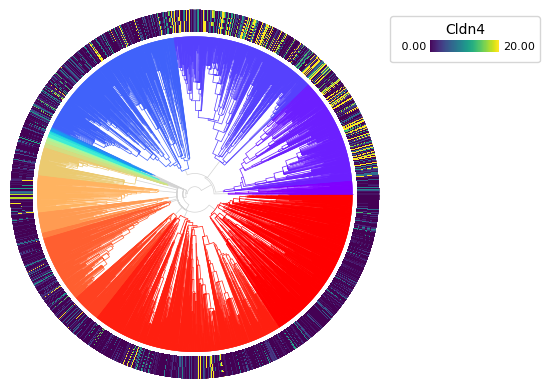

In [ ]:
py.pl.tree(tdata_slice, depth_key="time", branch_color="clade", palette=clade_palette, polar=True)
py.pl.annotation(tdata_slice, keys="alpha0", width=0.15, vmin=0,vmax=20);
py.pl.annotation(tdata_slice, keys="alpha1", width=0.15, vmin=0,vmax=20);
py.pl.annotation(tdata_slice, keys="alpha2", width=0.15, vmin=0,vmax=20);
py.pl.annotation(tdata_slice, keys="fitness", width=0.15, vmin=0,vmax=20); # does the clade with the highest fitness have the highest alpha?
py.pl.annotation(tdata_slice, keys="somegene", width=0.15, vmin=0,vmax=20); # spatially located gene?

In [ ]:
# Box plot: does the clade with highest fitness have the highest alpha?

### Alternative methods

In [47]:
results_rows = []
clade_column = 'clade_depth4'

In [51]:
C_feature, C_tree, C_space, a, b = spotr.prepare_ot_inputs(tdata_slice, sdata_slice, tree_distance_matrix.values, spatial_distance_matrix.values)
true_structure_score_level0 = utils.structural_concordance(C_tree, C_space, true_couplings)

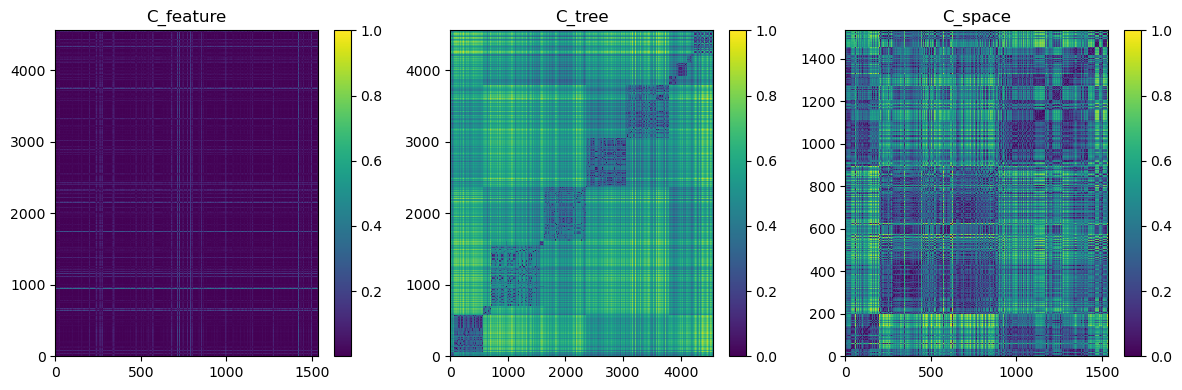

In [52]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

im0 = axs[0].pcolormesh(np.array(C_feature), cmap='viridis')
axs[0].set_title('C_feature')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].pcolormesh(np.array(C_tree), cmap='viridis')
axs[1].set_title('C_tree')
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].pcolormesh(np.array(C_space), cmap='viridis')
axs[2].set_title('C_space')
fig.colorbar(im2, ax=axs[2])
plt.tight_layout()
plt.show()

In [48]:
# Run Wasserstein OT
coupling, _ = spotr.sinkhorn_fgw(C_feature, C_tree, C_space, a, b, 0.01, T_sinkhorn=100, J_alt=0, 
                            alpha=0.0, gamma0=None, uv0=None)
utils.compute_inferred_clade_fractions(tdata_slice, coupling, sdata_slice, clade_column=clade_column)
mean_pearson_corr = utils.compute_clades_pearson_corr(sdata_slice.obsm[f'{clade_column}_fractions'], sdata_slice.obsm[f'inferred_{clade_column}_fractions'])
structure_score_level0 = utils.structural_concordance(C_tree, C_space, coupling, eps=1e-12)

results_rows.append({
    'method': 'Wasserstein OT',
    'pcorr': mean_pearson_corr,
    'structure_score': structure_score_level0,
})

α=0.000 | C med=2.000e+00 min=-5.779e+02 max=6.494e+01
α=0.000 | C med=2.032e+00 min=-5.872e+02 max=6.599e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | C med=2.032e+00 min=-5.871e+02 max=6.597e+01
α=0.000 | 

KeyboardInterrupt: 

In [ ]:
# SpOTr
utils.compute_inferred_clade_fractions(tdata_slice, coupling, sdata_slice, clade_column=clade_column)
mean_pearson_corr = utils.compute_clades_pearson_corr(sdata_slice.obsm[f'{clade_column}_fractions'], sdata_slice.obsm[f'inferred_{clade_column}_fractions'])
structure_score_level0 = utils.structural_concordance(C_tree, C_space, coupling, eps=1e-12)



# Run Wasserstein OT
coupling, _ = spotr.sinkhorn_fgw(C_feature, C_tree, C_space, a, b, 0.01, T_sinkhorn=100, J_alt=20, 
                            alpha=0.0, gamma0=None, uv0=None)
utils.compute_inferred_clade_fractions(tdata_slice, coupling, sdata_slice, clade_column=clade_column)
mean_pearson_corr = utils.compute_clades_pearson_corr(sdata_slice.obsm[f'{clade_column}_fractions'], sdata_slice.obsm[f'inferred_{clade_column}_fractions'])
structure_score_level0 = utils.structural_concordance(C_tree, C_space, coupling, eps=1e-12)

results_rows.append({
    'method': 'Wasserstein OT',
    'pcorr': mean_pearson_corr,
    'structure_score': structure_score_level0,
})

# Run GW OT
coupling, _ = spotr.sinkhorn_fgw(C_feature, C_tree, C_space, a, b, 0.01, T_sinkhorn=100, J_alt=20, 
                            alpha=1.0, gamma0=None, uv0=None)
utils.compute_inferred_clade_fractions(tdata_slice, coupling, sdata_slice, clade_column=clade_column)
mean_pearson_corr = utils.compute_clades_pearson_corr(sdata_slice.obsm[f'{clade_column}_fractions'], sdata_slice.obsm[f'inferred_{clade_column}_fractions'])
structure_score_level0 = utils.structural_concordance(C_tree, C_space, coupling, eps=1e-12)

results_rows.append({
    'method': 'GW OT',
    'pcorr': mean_pearson_corr,
    'structure_score': structure_score_level0,
})

M3-4-42925    1
M3-4-44234    1
M3-4-44246    1
M3-4-44253    1
M3-4-44294    1
             ..
M3-4-66688    1
M3-4-66696    1
M3-4-66709    1
M3-4-66723    1
M3-4-67320    1
Name: clone, Length: 4647, dtype: category
Categories (1, object): ['1']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the results to a DataFrame if not already
results_df = pd.DataFrame(results_rows)

# Bar plot of the Pearson correlation (pcorr) of different methods
plt.figure(figsize=(6, 4))
plt.bar(results_df['method'], results_df['pcorr'], color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Mean Pearson Correlation')
plt.xlabel('Method')
plt.ylim(0, 1)
for i, v in enumerate(results_df['pcorr']):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()
